In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

### Load the the Magic Gamma Hadron dataset

In [2]:
df=pd.read_csv('data\\magic04.data',header=None)
cols=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df.columns=cols
df['class']=df['class'].map({'g':0,'h':1})

### Create histogram of feature Relations to get insights

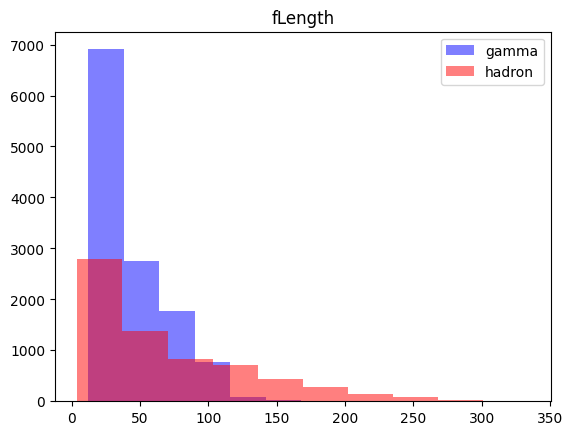

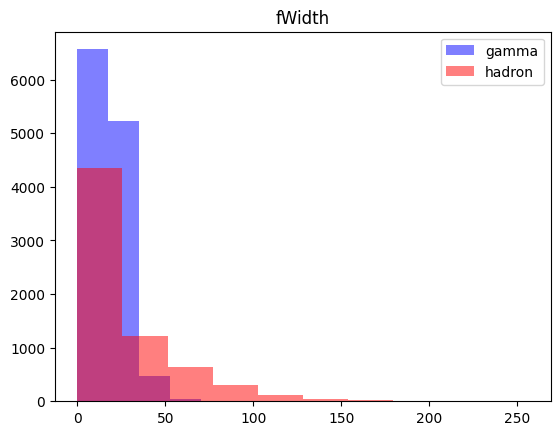

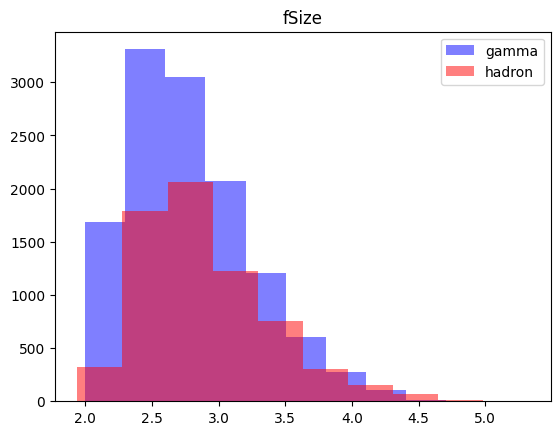

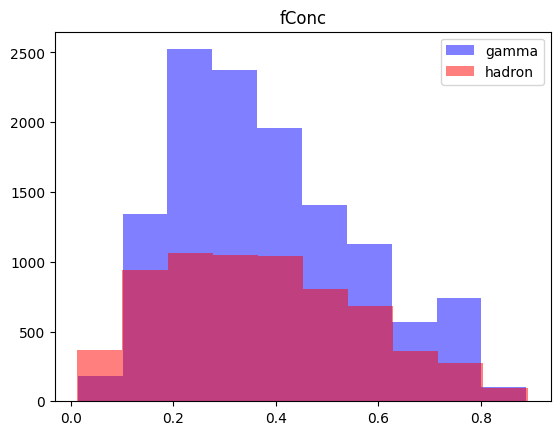

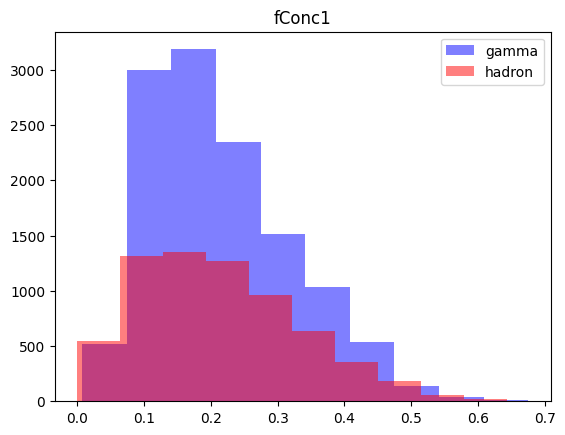

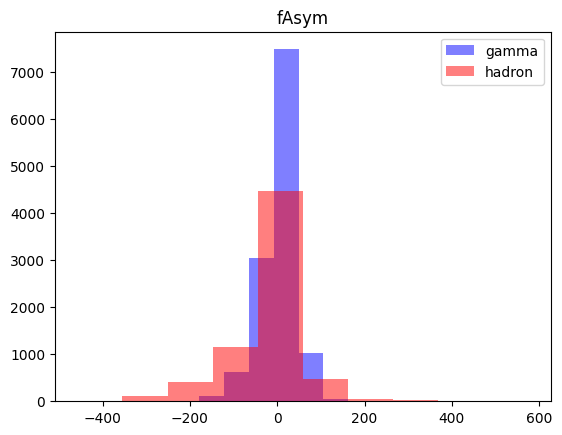

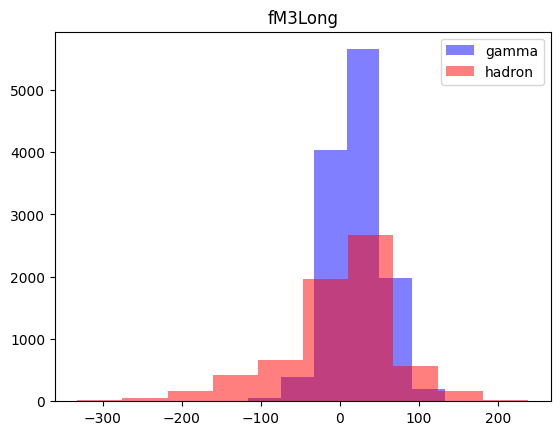

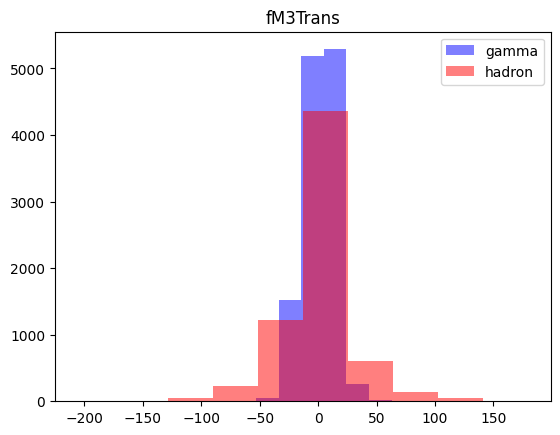

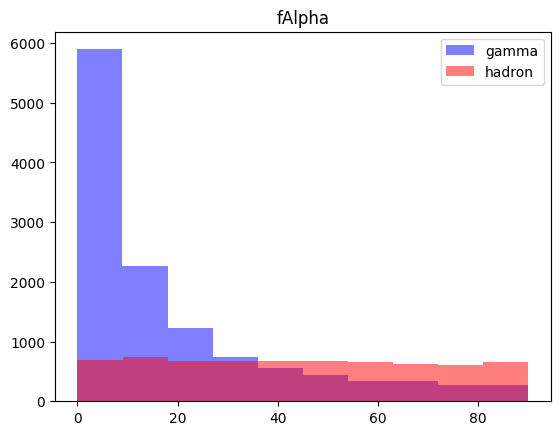

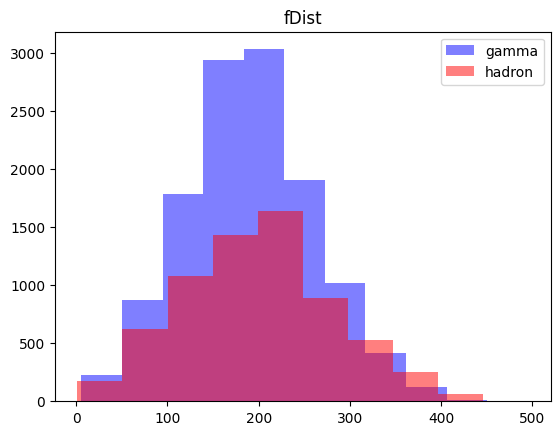

In [16]:
cols_features=cols[:-1]

for col in cols_features:
    plt.figure()
    plt.hist(df[df['class']==0][col],color='blue',alpha=0.5,label='gamma')
    plt.hist(df[df['class']==1][col],color='red',alpha=0.5,label='hadron')
    plt.legend()
    plt.title(col)
    plt.show()

### Train, Valid, test datasets

In [4]:
train,valid,test=np.split(df.sample(frac=1,random_state=42),[int(.6*len(df)),int(.8*len(df))])



c:\Users\abhip\OneDrive\Documents\GitHub\envs\ml-libs\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [5]:
df['class'].value_counts()

class
0    12332
1     6688
Name: count, dtype: int64

### Data Preprocessing (Scaling and OverSampling)

In [6]:
def scale_data(df,oversample=True):
    X=df[cols_features].values
    y=df['class'].values



    scaler=StandardScaler()
    if oversample:
        smote=SMOTE(random_state=42)
        X,y=smote.fit_resample(X,y)


    X_scaled=scaler.fit_transform(X)

    
    data=np.hstack((X_scaled,y.reshape(-1,1)))
    return data,X_scaled,y


train,X_train,y_train=scale_data(train,True)
valid,X_valid,y_valid=scale_data(valid,False)
test,X_test,y_test=scale_data(test,False)
    

### K-Nearest Neighbours
- Find the k nearest neighbours to your point. Get the value of the majority of those neighbours (usually 3-5)
- Distance is euclidean

In [7]:
#implement k nearest neighbours
def knnFunc(X_train,y_train,X_test,k=5):

    y_pred=[]

    for test_point in X_test:
        distance=np.linalg.norm(X_train - test_point,axis=1)
        knn_indices=np.argsort(distance)[:k]
        knn_labels=y_train[knn_indices]
        unique,count=np.unique(knn_labels,return_counts=True)
        majority_lables=unique[np.argmax(count)]

        y_pred.append(majority_lables)

    return np.array(y_pred)

y_pred=knnFunc(X_train,y_train,X_test,k=5)

accuracy=np.sum(y_pred==y_test)/len(y_test)
print(f'My Func: {accuracy*100:.2f}%')

#Option 2: Sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

knn=KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
labels=knn.predict(X_test)

print("SkLearn Func:",accuracy_score(y_test,labels))

print(classification_report(y_test,labels))

My Func: 79.97%
SkLearn Func: 0.7996845425867508
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      2473
           1       0.69      0.78      0.73      1331

    accuracy                           0.80      3804
   macro avg       0.78      0.80      0.79      3804
weighted avg       0.81      0.80      0.80      3804



### Niave Bayes
                Covide Test
                    1           0
-  Has      1       531         6      537      
-  Covid    0       20       9443      9466      
-                   551      
                   

What is the prob of having covid given a positive test?
- p(covid| +ve test)= 531/551=96.4%

Bayes Rule: P(A|B)=(P(B|A)P(A))/P(B)

EX:
- P(fp)=0.05, p(fn)=0.01 => P(+ve|~d)=0.05, p(-ve| d)=0.01
- p(d)=0.1

-P(d|+ve test)= (p(+ve|d)p(d))/p(+ve)
              = (1-p(-ve|d))*0.1/(p(+ve|d))+p(+ve|~d)
              =(1-0.01)*0.1/((1-0.01)+0.05)
              =0.099/(0.099+0.05*.9)
              = 0.6875


In [8]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()

nb_model.fit(X_train,y_train)
y_pred-nb_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7996845425867508
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      2473
           1       0.69      0.78      0.73      1331

    accuracy                           0.80      3804
   macro avg       0.78      0.80      0.79      3804
weighted avg       0.81      0.80      0.80      3804



## Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()

lr_model.fit(X_train,y_train)
y_pred-lr_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7996845425867508
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      2473
           1       0.69      0.78      0.73      1331

    accuracy                           0.80      3804
   macro avg       0.78      0.80      0.79      3804
weighted avg       0.81      0.80      0.80      3804



### Support Vector Machine (SVM)
- Find the hyperplane that differentiates the two classess the best
- We also want to maintain a margin between the two classess (try to maximize the distance to the closest point while best separating the two classes)
![image](images\\svm.png)
- This is vulnerable to outliers as the presense of a outliers will completly change how the hyperplanes are created
- Can use kernel trick to create projection to separate non-linear separable points


In [10]:
from sklearn.svm import SVC
svc_model=SVC()

svc_model.fit(X_train,y_train)
y_pred-svc_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred)) 

0.7996845425867508
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      2473
           1       0.69      0.78      0.73      1331

    accuracy                           0.80      3804
   macro avg       0.78      0.80      0.79      3804
weighted avg       0.81      0.80      0.80      3804



### Neural Net

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

nn_model=tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

nn_model.compile(keras.optimizers.Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])

history=nn_model.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_valid,y_valid),verbose=0)

# y_pred=nn_model.predict(X_test)>0.5

# print(accuracy_score(y_test,y_pred))
# print(classification_report(y_test,y_pred))

c:\Users\abhip\OneDrive\Documents\GitHub\envs\ml-libs\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


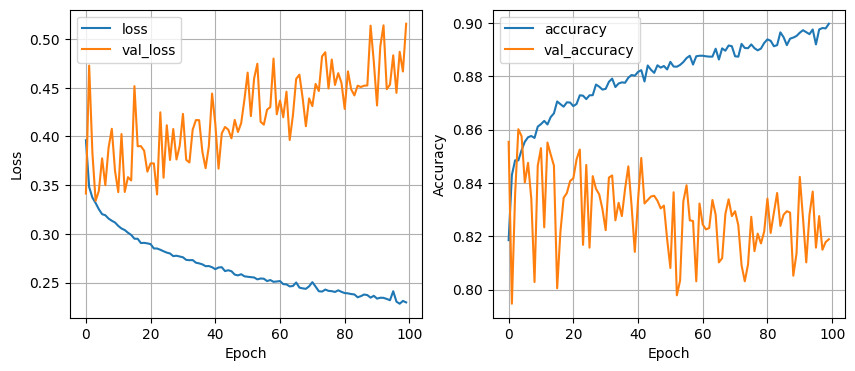

In [14]:
def plot_history(history):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
    ax1.plot(history.history['loss'],label='loss')
    ax1.plot(history.history['val_loss'],label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['accuracy'],label='accuracy')
    ax2.plot(history.history['val_accuracy'],label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'],label='accuracy')
    plt.plot(history.history['val_accuracy'],label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(history)
# plot_accuracy(history)

training model with epochs=100,num_node=32,drop_out=0,batch_size=32,validation_split=0.2,learning_rate=0.005
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.8441 - loss: 0.4434


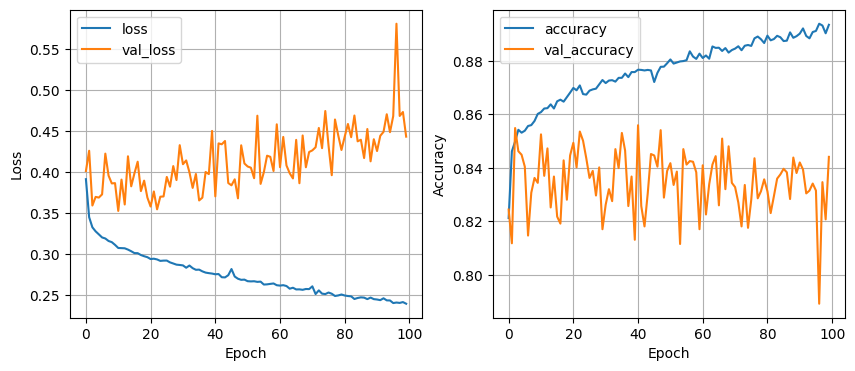

training model with epochs=100,num_node=32,drop_out=0,batch_size=64,validation_split=0.2,learning_rate=0.005
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.8391 - loss: 0.4136


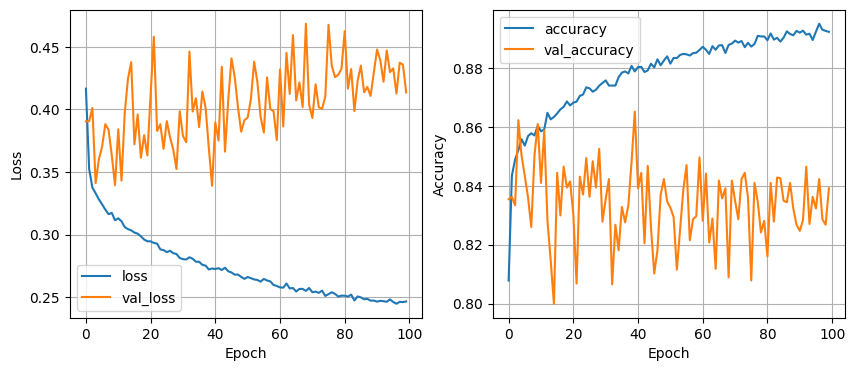

training model with epochs=100,num_node=32,drop_out=0,batch_size=128,validation_split=0.2,learning_rate=0.005
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8504 - loss: 0.3977  


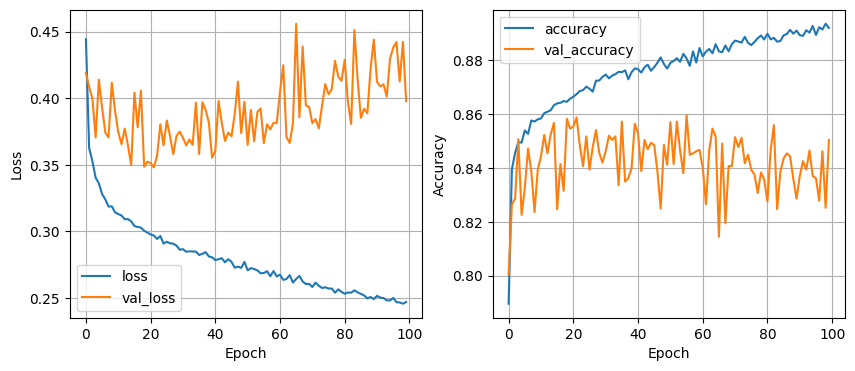

training model with epochs=100,num_node=32,drop_out=0,batch_size=32,validation_split=0.2,learning_rate=0.001
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.8436 - loss: 0.3863


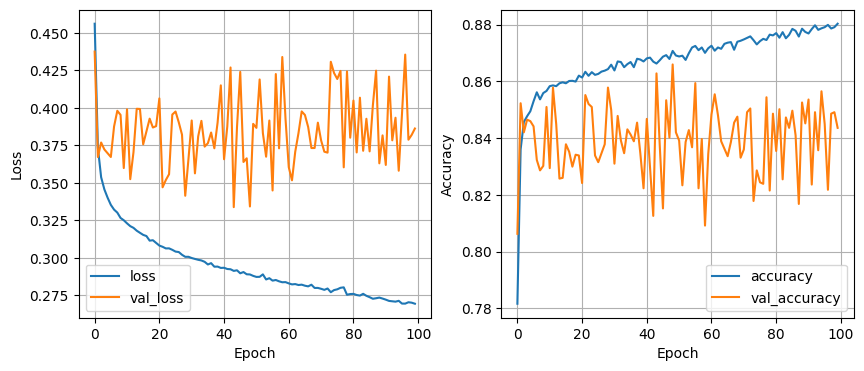

training model with epochs=100,num_node=32,drop_out=0,batch_size=64,validation_split=0.2,learning_rate=0.001
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.8494 - loss: 0.3613


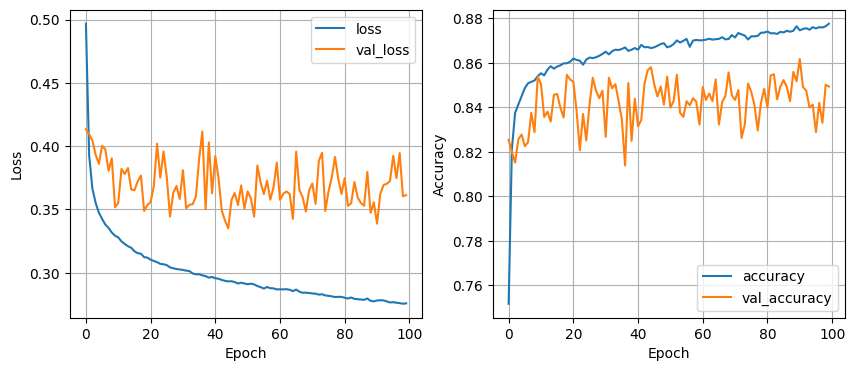

training model with epochs=100,num_node=32,drop_out=0,batch_size=128,validation_split=0.2,learning_rate=0.001
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8420 - loss: 0.3794  
training model with epochs=100,num_node=32,drop_out=0,batch_size=32,validation_split=0.2,learning_rate=0.1
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.8233 - loss: 0.4424
training model with epochs=100,num_node=32,drop_out=0,batch_size=64,validation_split=0.2,learning_rate=0.1
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8346 - loss: 0.4479  
training model with epochs=100,num_node=32,drop_out=0,batch_size=128,validation_split=0.2,learning_rate=0.1
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.8520 - loss: 0.3839
training model with epochs=100,num_node=32,drop_out=0.2,batch_size=32,validation_split=0.2,learning_rate=0.005
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8617 - loss: 0.3477  


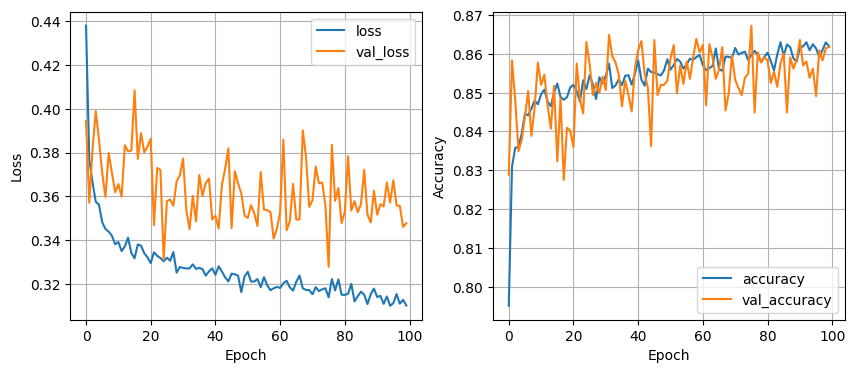

training model with epochs=100,num_node=32,drop_out=0.2,batch_size=64,validation_split=0.2,learning_rate=0.005
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8373 - loss: 0.3709
training model with epochs=100,num_node=32,drop_out=0.2,batch_size=128,validation_split=0.2,learning_rate=0.005
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8499 - loss: 0.3599  
training model with epochs=100,num_node=32,drop_out=0.2,batch_size=32,validation_split=0.2,learning_rate=0.001
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8515 - loss: 0.3619  
training model with epochs=100,num_node=32,drop_out=0.2,batch_size=64,validation_split=0.2,learning_rate=0.001
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.8649 - loss: 0.3339


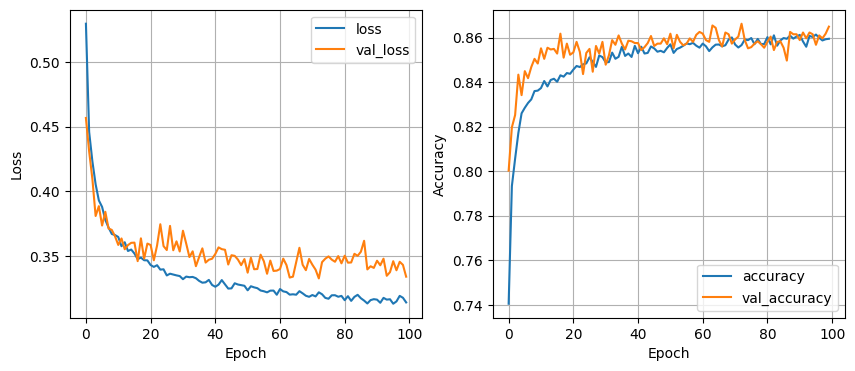

training model with epochs=100,num_node=32,drop_out=0.2,batch_size=128,validation_split=0.2,learning_rate=0.001
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.8596 - loss: 0.3491
training model with epochs=100,num_node=32,drop_out=0.2,batch_size=32,validation_split=0.2,learning_rate=0.1
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8370 - loss: 0.5367  
training model with epochs=100,num_node=32,drop_out=0.2,batch_size=64,validation_split=0.2,learning_rate=0.1
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.8244 - loss: 0.4342
training model with epochs=100,num_node=32,drop_out=0.2,batch_size=128,validation_split=0.2,learning_rate=0.1
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8110 - loss: 0.4194  
training model with epochs=100,num_node=32,drop_out=0.3,batch_size=32,validation_split=0.2,learning_rate=0.005
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.8525 - loss: 0.3656
training model with epochs=100,num_node=32,drop_out=0.3,batch_si

In [15]:
def train_model(X_train,y_train,epochs=100,num_node=64,drop_out=0.2,batch_size=32,learning_rate=0.01,validation_split=0.2):
    print(f'training model with epochs={epochs},num_node={num_node},drop_out={drop_out},batch_size={batch_size},validation_split={validation_split},learning_rate={learning_rate}')
    nn_model=tf.keras.Sequential([
    tf.keras.layers.Dense(num_node,activation='relu',input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(drop_out),
    tf.keras.layers.Dense(num_node,activation='relu'),
    tf.keras.layers.Dropout(drop_out),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])
    nn_model.compile(keras.optimizers.Adam(learning_rate=learning_rate),loss='binary_crossentropy',metrics=['accuracy'])
    history=nn_model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_valid,y_valid),verbose=0)
    return nn_model,history

least_loss_val=float('inf')
least_loss_model=None
least_loss_params={}
epochs=100
for num_node in [32,64,128]:
    for drop_out in [0,0.2,0.3]:
        for lr in [0.005,0.001,0.1]:
            for batch_size in [32,64,128]:
                model,history=train_model(X_train,y_train,epochs,num_node,drop_out,batch_size,lr)
                val_loss=model.evaluate(X_valid,y_valid)[0]
                if val_loss<least_loss_val:
                    plot_history(history)
                    least_loss_val=val_loss
                    least_loss_model=model
                    least_loss_params={'num_node':num_node,'drop_out':drop_out,'lr':lr,'batch_size':batch_size}
print(least_loss_params)




In [21]:
y_pred=least_loss_model.predict(X_test)
print(accuracy_score(y_test,y_pred>0.5))
print(classification_report(y_test,y_pred>0.5))


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step
0.8556782334384858
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      2473
           1       0.78      0.82      0.80      1331

    accuracy                           0.86      3804
   macro avg       0.84      0.85      0.84      3804
weighted avg       0.86      0.86      0.86      3804



### Linear Regression
- Find the best fit for our data (regression problem)
- Assumptions:
    - Linearity
    - Independance
    - normality
    - homokedascity

![image](images\\lin_reg.png)
